<a href="https://colab.research.google.com/github/akashban812/DS-practice/blob/main/Logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os as os
os.chdir('/content/drive/MyDrive/DS notebooks')
os.getcwd()

'/content/drive/MyDrive/DS notebooks'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       162
           1       0.80      0.68      0.73       106

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



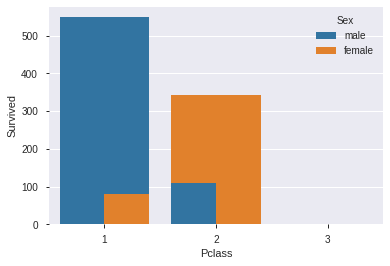

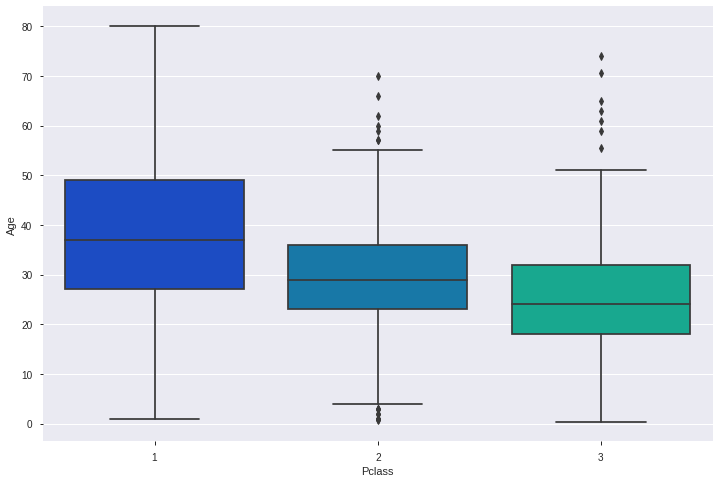

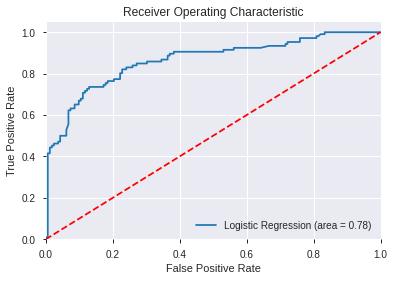

In [3]:


#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
get_ipython().run_line_magic('matplotlib', 'inline')







# In[3]:


#Import Titanic Dataset
titanic_data = pd.read_csv('Titanic_Dataset.csv')


# In[4]:


#Count number of passenger who survived and NOT survived: 0 = Not Survived, 1 = Survived
sns.countplot(x='Survived',data=titanic_data)


# In[5]:


#Count number of males and females who survived and NOT survived: 0 = Not Survived, 1 = Survived
sns.countplot(x='Survived',hue='Sex',data=titanic_data)


# In[6]:


#Count which class passengers survived most
sns.barplot(x='Pclass', y='Survived', data=titanic_data)


# In[7]:


#Verify missing values in each column
titanic_data.isnull().sum()


# In[8]:


#Check data types of each column and hence finding out which columns are categorical in nature
titanic_data.info()


# In[9]:


#Visualize and find out average age by class
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass',y='Age',data=titanic_data,palette='winter')


# In[10]:


#Function to impute missing values in age column based on class
def imput_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(titanic_data[titanic_data["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age


# In[11]:


#Impute missing values in age column by average age
titanic_data["Age"] = titanic_data[["Age", "Pclass"]].apply(imput_age,axis=1)


# In[12]:


#Drop Cabin column
titanic_data.drop("Cabin",inplace=True,axis=1)


# In[13]:


#Impute Embarked missing values with most common values
most_common_value = 'S'

for data in titanic_data:
    titanic_data['Embarked'] = titanic_data['Embarked'].fillna(most_common_value)


# In[14]:


#Check if there are any missing values left
titanic_data.isnull().sum()


# In[15]:


#Convert categorical variables into Dummy variables
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
pclass = pd.get_dummies(titanic_data["Pclass"],drop_first=True)


# In[16]:


#Drop irrelevant columns
titanic_data.drop(['PassengerId','Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)


# In[17]:


#Validate the columns and data
titanic_data.head()


# In[18]:


#Concatenate the dummy variables, created above
titanic_data = pd.concat([titanic_data,sex,embark,pclass],axis=1)
titanic_data.head()


# In[19]:


#Create Feature variable X and Target variable y
X = titanic_data.drop("Survived",axis=1)
y = titanic_data['Survived']


# In[20]:


#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)


# In[21]:


#Fit the logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)
pred


# In[22]:


#Check the values of first record correspoding to the first vector value given above.
X_test.head(1)


# In[28]:


#Calculate Precision, Recall and F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))


# In[24]:


#Generate confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,pred)
conf_mat


# In[26]:


#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()





